# **Data Preprocessing :**
Preprocessing the data for future Time Series Analysis Modeling

In [ ]:
# Importing required packages

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import timedelta, datetime
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define dates to fetch stock data

today = dt.date.today()
d1 = today.strftime("%Y-%m-%d")
enddate = today

d2 = today - timedelta(days=365*2)
d2 = d2.strftime("%Y-%m-%d")
startdate = d2

print("Start Date:", startdate)
print("End Date:", enddate)

Start Date: 2023-07-06
End Date: 2025-07-05


In [ ]:
ticker = 'TATAMOTORS.NS'
# Fetching stock data using yfinance

df = yf.download(ticker, start=startdate, end=enddate, progress = False)
df.columns = df.columns.droplevel('Ticker')
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2023-07-06,592.000793,596.090037,579.930204,582.147251,14356681
2023-07-07,609.145996,615.649310,583.526786,591.212537,21066726
2023-07-10,609.589355,625.502789,608.505430,614.860976,23802524
2023-07-11,619.295166,621.216619,613.038190,615.797170,12051173
2023-07-12,612.348389,621.561427,610.279109,620.723899,10785502
...,...,...,...,...,...
2025-06-30,688.000000,691.900024,685.000000,688.900024,6960104
2025-07-01,683.799988,693.849976,680.400024,691.099976,6866073
2025-07-02,688.549988,692.450012,680.650024,683.799988,8034013


In [ ]:
df.insert(0, 'Date', df.index)
# df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    493 non-null    datetime64[ns]
 1   Close   493 non-null    float64       
 2   High    493 non-null    float64       
 3   Low     493 non-null    float64       
 4   Open    493 non-null    float64       
 5   Volume  493 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 23.2 KB


In [ ]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
count,493,493.000000,493.000000,493.000000,493.000000,4.930000e+02
mean,2024-07-06 00:29:12.535496960,796.498569,806.847796,787.491285,798.469776,1.269633e+07
min,2023-07-06 00:00:00,574.807922,577.038742,531.183000,555.722019,0.000000e+00
25%,2024-01-04 00:00:00,662.652588,669.954600,655.414856,662.305592,8.324354e+06
50%,2024-07-09 00:00:00,765.319946,776.325311,751.935010,764.427580,1.087302e+07
75%,2025-01-06 00:00:00,949.431885,958.031132,937.719059,951.816447,1.428910e+07
max,2025-07-04 00:00:00,1151.945801,1168.949630,1135.536938,1157.051852,5.981103e+07
std,NaN,153.025373,155.207258,150.929272,153.714820,7.563426e+06


In [ ]:
# Make a plot for all the columns
fig = px.line(df, x='Date', y=df.columns, title='Stock Data Overview', width=1200, height=500)
fig.show()

In [ ]:
df1 = df[['Date', 'Close']]

In [ ]:
# Plotting the closing price of the stock
fig = px.line(df1, x='Date', y='Close', title=f'{ticker} Closing Price',width=1200, height=500)
fig.show()

# **Stationarity Check :**
Many time series models assume stationarity (constant statistical properties over time) for reliable forecasting.
The ADF test is used to check for stationarity, with a low p-value (typically < 0.05) indicating that the series is stationary.

In [ ]:
# Importing the required libraries for stationarity check
from statsmodels.tsa.stattools import adfuller

In [ ]:
def stationarity_check(df1):
    """
    Perform the Augmented Dickey-Fuller test to check for stationarity.
    """
    result = adfuller(df1)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Rejects null hypothesis, Data is stationary")
    else:
        print("Fails to reject null hypothesis, Data is non-stationary")

# Stationarity Check
stationarity_check(df1['Close'])

ADF Statistic: -1.391721
p-value: 0.586239
Fails to reject null hypothesis, Data is non-stationary


# **Decompose Data :**
Time series decomposition separates a series into its underlying components: trend (long-term movement), seasonality (recurring patterns), and residuals (random noise). This helps in understanding the data's structure and can improve forecasting by modeling each component individually.

In [ ]:
# Importing the seasonal decomposition library
from statsmodels.tsa.seasonal import seasonal_decompose

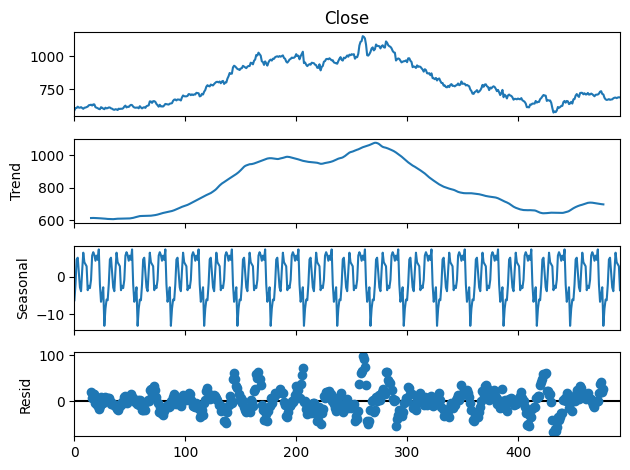

In [ ]:
decompose = seasonal_decompose(df1['Close'], model='additive', period=30)
decompose.plot();

# **Auto Correlation check :**
Autocorrelation analysis examines the correlation between a time series and its lagged versions, revealing repeating patterns (like seasonality) or trends. Significant autocorrelations indicate that past values influence current ones, which is crucial for selecting appropriate time series models (e.g., ARIMA).

In [ ]:
# Importing ACF and PACF libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

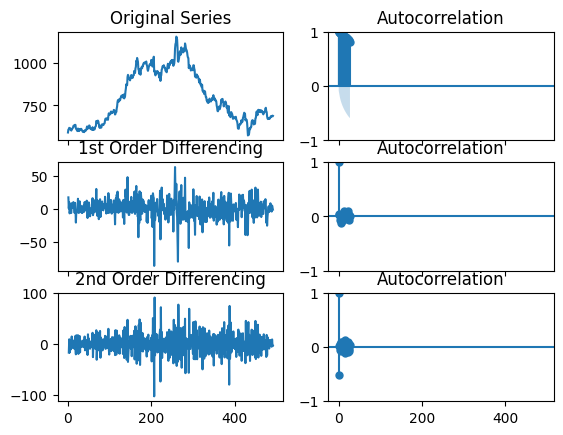

In [ ]:
# Original series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df1['Close'], ax=axes[0, 1])

# 1st differencing
axes[1, 0].plot(df1['Close'].diff()); axes[1, 0].set_title('\n1st Order Differencing')
plot_acf(df1['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd differencing
axes[2, 0].plot(df1['Close'].diff().diff()); axes[2, 0].set_title('\n2nd Order Differencing')
plot_acf(df1['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

*`Therefore, d = 1`*

**Finding the value of p :**

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

# pd.plotting.autocorrelation_plot(df['Close']) -> This a smoothed line plot to determine the value of p for ARIMA modeling

# plot_acf(df['Close'], alpha=0.05); -> This is a bar plot to determine the value of p where it falls below the 95% confidence interval or 0.05 significance level

x_acf = pd.DataFrame(acf(df1['Close'], nlags=20))
print(x_acf)

           0
0   1.000000
1   0.992805
2   0.985615
3   0.977926
4   0.970016
5   0.962736
6   0.956064
7   0.949361
8   0.943554
9   0.938381
10  0.933088
11  0.927847
12  0.922660
13  0.916620
14  0.910957
15  0.905538
16  0.899523
17  0.893884
18  0.888389
19  0.882878
20  0.876813


*`Therefore, p = 6`*, as 95% confidence level is till 6th index value

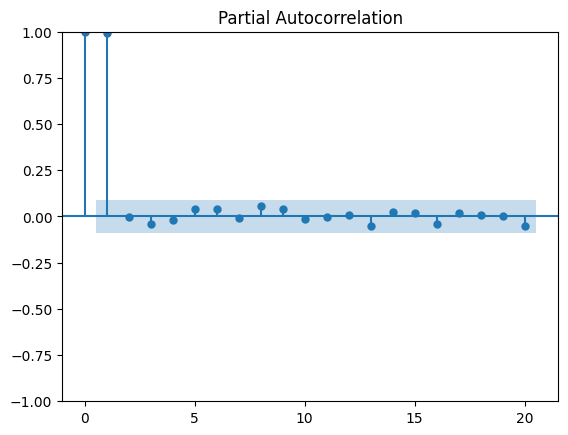

In [ ]:
plot_pacf(df1['Close'], lags=20, alpha=0.05);

*`Therefore, q = 2`*, as 95% confidence level have only 2 spikes

In [ ]:
# Lets define the values of p, d, q based on the above analysis

p = 6
d = 1
q = 2  # Assuming q=2 based on the ACF plot

# **ARIMA model :**
Putting the value of p, d, q and fiting the model to ARIMA

In [ ]:
# Importing Libraries for ARIMA modeling
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 6,1,2

model = ARIMA(df1['Close'], order=(p, d, q))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  493
Model:                 ARIMA(6, 1, 2)   Log Likelihood               -2029.527
Date:                Sat, 05 Jul 2025   AIC                           4077.054
Time:                        15:08:56   BIC                           4114.840
Sample:                             0   HQIC                          4091.892
                                - 493                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0958      0.900      0.106      0.915      -1.669       1.861
ar.L2          0.4977      0.452      1.100      0.271      -0.389       1.384
ar.L3          0.0215      0.064      0.337      0.7

Generating a 30-Day forecast

In [ ]:
# Generate forecast
n_forecast = 30

# Get forecast object
forecast_obj = model.get_forecast(steps=n_forecast)
forecast_values = forecast_obj.predicted_mean

last_date = df1.index[-1]

# Create forecast index
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='D')
forecast_series = pd.Series(forecast_values.values, index=forecast_index)

Ploting the Actual vs next 30-Day forecast data

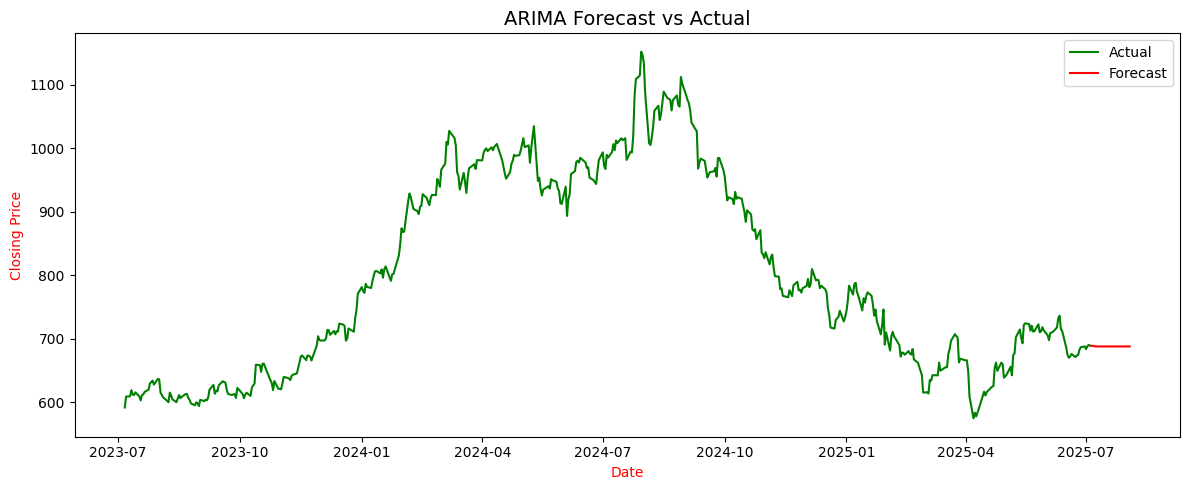

In [ ]:
# Plot actual and forecast with aligned datetime x-axis
plt.figure(figsize=(12, 5))
plt.plot(df1['Close'], label='Actual', color='green')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual', fontsize=14)
plt.xlabel('Date', color='red')
plt.ylabel('Closing Price', color='red')
plt.legend()
plt.tight_layout()
plt.show()

# **SARIMA Modeling :**

In [ ]:
# Importing necessary libraries for SARIMA modeling
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# To ensure 'Date' is in datetime and set as index
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

Dividing and spliting the data into Train and Test sets and finally fiting it to the SARIMA model

In [ ]:
# Train-test split
train_size = int(len(df1) * 0.8)
train, test = df1['Close'][:train_size], df1['Close'][train_size:]

train.shape, test.shape

((394,), (99,))

In [ ]:
p, d, q = 6, 1, 2

model = sm.tsa.statespace.SARIMAX(df1['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  493
Model:             SARIMAX(6, 1, 2)x(6, 1, 2, 12)   Log Likelihood               -1996.243
Date:                            Sat, 05 Jul 2025   AIC                           4026.486
Time:                                    15:34:45   BIC                           4097.440
Sample:                                         0   HQIC                          4054.377
                                            - 493                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3101      1.549      0.200      0.841      -2.727       3.347
ar.L2          0.4144      0.964   

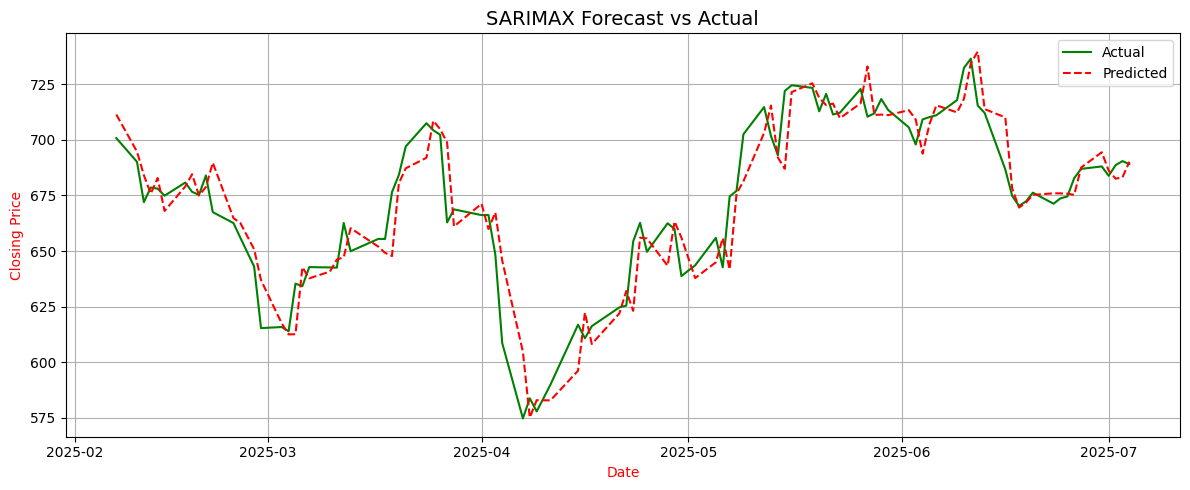

In [ ]:
# Forecast the test set
forecast = model.predict(start=len(train), end=len(train)+len(test)-1)

# Plot actual vs forecast
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual', color='green')
plt.plot(test.index, forecast, label='Predicted', color='red', linestyle ='--')
plt.xlabel('Date', color='red')
plt.ylabel('Closing Price', color='red')
plt.title('SARIMAX Forecast vs Actual', fontsize = 14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Predict next 30 days

# Forecast next 30 days from last point
future_start = df1.index[-1] + pd.Timedelta(days=1)
future_dates = pd.date_range(start=future_start, periods=30, freq='B')  # 30 business days

future_forecast = model.forecast(steps=30)
future_forecast.index = future_dates

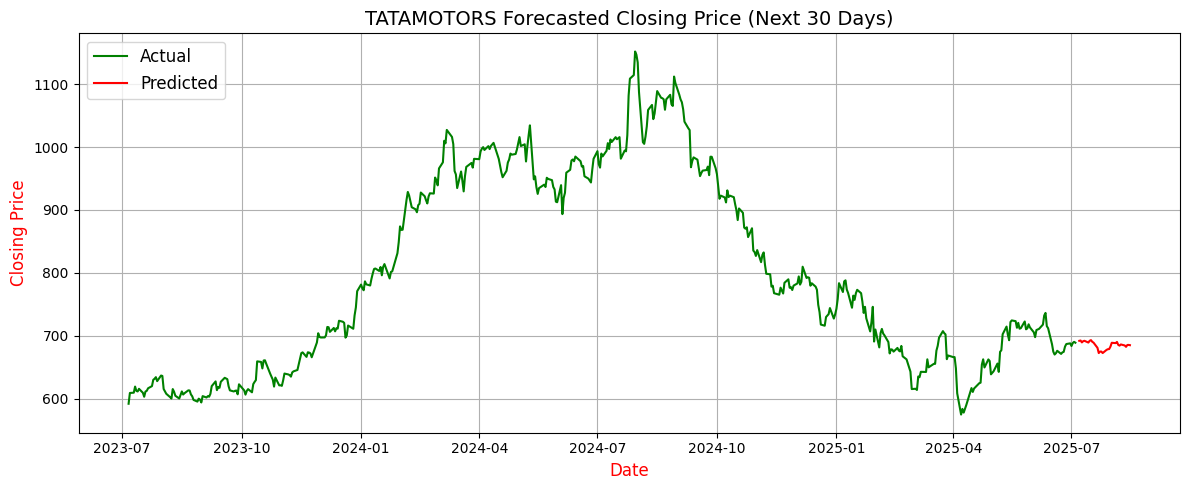

In [ ]:
# Plot full history + next 30 days forecast
plt.figure(figsize=(12, 5))
plt.plot(df1['Close'], color='green', label='Actual')
plt.plot(future_forecast.index, future_forecast, color='red', label='Predicted')
plt.xlabel('Date', color='red',fontsize=12)
plt.ylabel('Closing Price', color='red',fontsize=12)
plt.title('TATAMOTORS Forecasted Closing Price (Next 30 Days)',fontsize = 14)
plt.legend(loc='upper left', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculating the Model Performance

In [ ]:
# Calculate evaluation metrics of SARIMAX

print("SARIMAX Model Performance Metrics :\n")

# MSE
mse = mean_squared_error(test, forecast)
print(f"MSE: {mse:.2f}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# MAE
mae = mean_absolute_error(test, forecast)
print(f"MAE: {mae:.2f}")

# MAPE
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f"MAPE: {mape:.2f}%")

# R² Score
r2 = r2_score(test, forecast)
print(f"R² Score: {r2:.4f}")

SARIMAX Model Performance Metrics :

MSE: 166.55
RMSE: 12.91
MAE: 9.32
MAPE: 1.40%
R² Score: 0.8721


**`Ljung Box test`** :
If lb p-value >= 0.05 ==> Fail to reject Null Hypothesis ==> No significant autocorrelation ==> **`Model is adequate`**

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(model.resid, lags=[10], return_df=True)
lb_test

,lb_stat,lb_pvalue
10,0.618883,0.999982


The plots show no patterns in standardized residuals over time (indicating white noise), a normal distribution of residuals (histogram and Q-Q plot), and no significant autocorrelation in the residuals (correlogram).

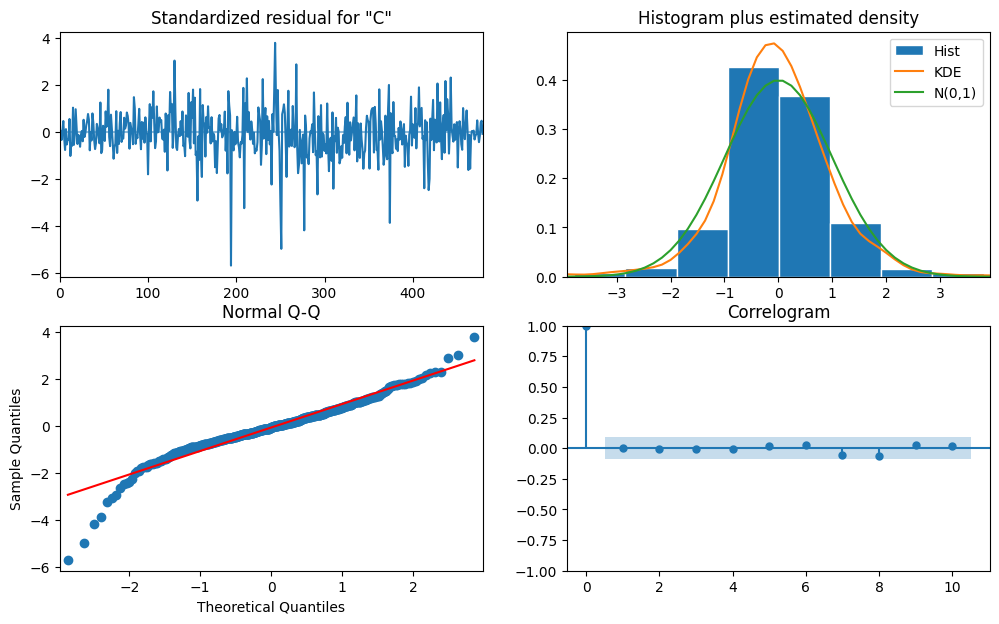

In [ ]:
model.plot_diagnostics(figsize=(12, 7))
plt.show()

# **GARCH Model :**

In [ ]:
# Importing the required models for GARCH model
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Compute Log Returns (in %)
returns = 100 * np.log(df1['Close'] / df1['Close'].shift(1)).dropna()
returns.head()

,Close
1,2.854999
2,0.072757
3,1.579646
4,-1.128062
5,-0.128802


Plotting the Log Returns from the data

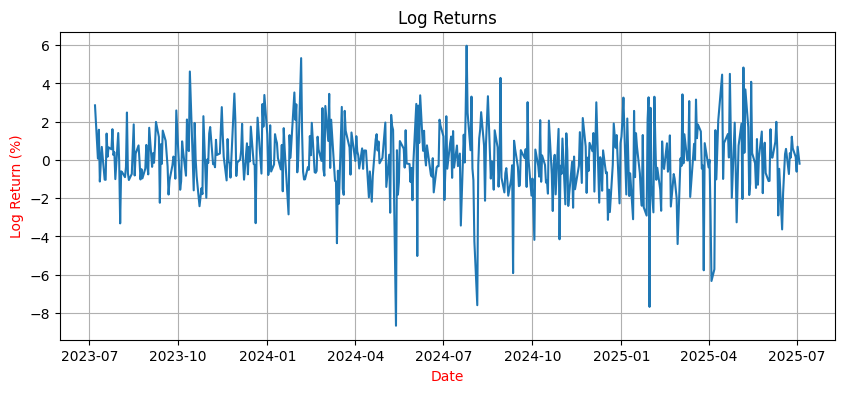

In [ ]:
# Plot the Log Returns
plt.figure(figsize=(10, 4))
plt.plot(returns)
plt.title('Log Returns')
plt.ylabel('Log Return (%)', color='red')
plt.xlabel('Date', color='red')
plt.grid(True)
plt.show()

# PACF for GARCH moodeling :

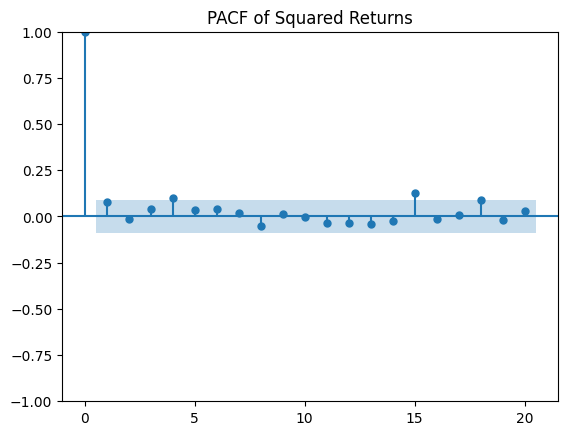

In [ ]:
# Plot PACF of Squared Returns to Check for Volatility Clustering
plot_pacf(returns**2, lags=20)
plt.title('PACF of Squared Returns')
plt.show()

# Fitting the Model  :
Initializing and fitting an EGARCH model with an order of p=3 and q=1, assuming a Student's t-distribution for the errors, to model the returns data.

In [ ]:
model = arch_model(returns, vol='EGARCH', p=3, q=1, dist='t')
model_fit = model.fit(disp='on')  # You can set disp='off' to suppress output
print(model_fit.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 24699.861243430252
Iteration:      2,   Func. Count:     21,   Neg. LLF: 23057.816634130675
Iteration:      3,   Func. Count:     32,   Neg. LLF: 2116.3952794841152
Iteration:      4,   Func. Count:     42,   Neg. LLF: 1076.9977115294168
Iteration:      5,   Func. Count:     52,   Neg. LLF: 1110.2353207013402
Iteration:      6,   Func. Count:     61,   Neg. LLF: 9059.76517710912
Iteration:      7,   Func. Count:     71,   Neg. LLF: 979.142728544044
Iteration:      8,   Func. Count:     80,   Neg. LLF: 965.3902350311942
Iteration:      9,   Func. Count:     89,   Neg. LLF: 964.5125849011857
Iteration:     10,   Func. Count:     97,   Neg. LLF: 964.3905787414078
Iteration:     11,   Func. Count:    105,   Neg. LLF: 964.3167980565632
Iteration:     12,   Func. Count:    113,   Neg. LLF: 964.2969886731739
Iteration:     13,   Func. Count:    121,   Neg. LLF: 964.2903124568302
Iteration:     14,   Func. Count:    129,   Neg. LLF: 964.285

Testing the Ljung Box test for checking the autocorrelation of the model

In [ ]:
lb_test = acorr_ljungbox(model_fit.std_resid.dropna(), lags=[10], return_df=True)
print("Ljung-Box Test Result:\n", lb_test)

Ljung-Box Test Result:
       lb_stat  lb_pvalue
10  13.020091   0.222551


In [ ]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

# Predicting the volatility of the stock with the actual returns

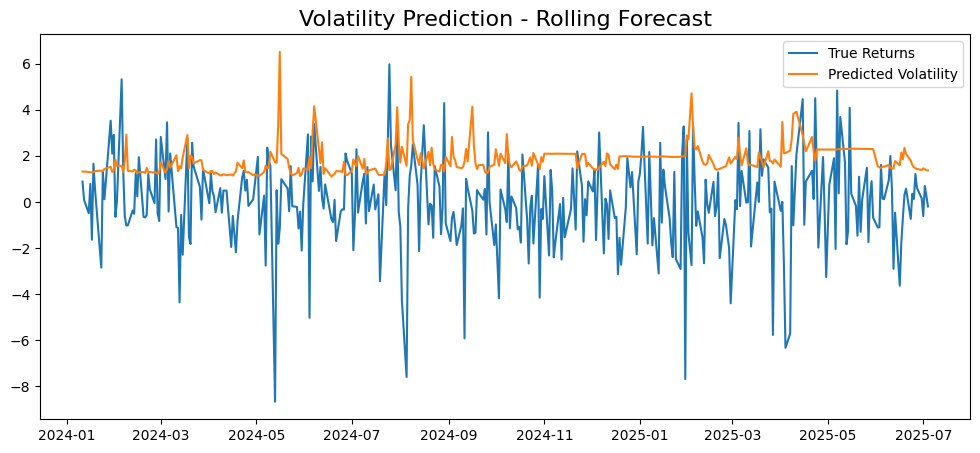

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

plt.figure(figsize=(12,5))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=16)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=10)

# Next 7-Day Forecast :

In [ ]:
# Used simulation-based forecast for horizon > 1
forecast_horizon = 7
forecast = model_fit.forecast(horizon=forecast_horizon, method='simulation')

# Get the forecasted variance (simulation returns mean forecast)
predicted_volatility = np.sqrt(forecast.variance.values[-1])

# Generate future business dates
last_date = returns.index[-1]
future_dates = pd.bdate_range(start=last_date, periods=forecast_horizon + 1)[1:]

# Create a Series for predicted volatility
predicted_vol_series = pd.Series(predicted_volatility, index=future_dates)

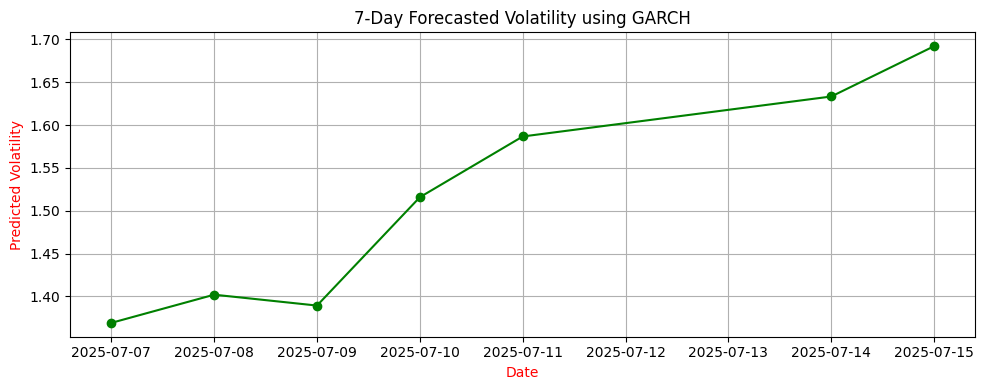

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 4))
plt.plot(predicted_vol_series, marker='o', color='green')
plt.title(f'{forecast_horizon}-Day Forecasted Volatility using GARCH')
plt.xlabel('Date', color='red')
plt.ylabel('Predicted Volatility', color='red')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure both series are aligned
actual_vol = returns.rolling(window=7).std().dropna()[-365:]
predicted_vol = rolling_predictions

# Drop any NaNs to avoid metric calculation errors
actual_vol, predicted_vol = actual_vol.align(predicted_vol, join='inner')

# Compute metrics
mse = mean_squared_error(actual_vol, predicted_vol)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_vol, predicted_vol)

# Display metrics
print("Model Evaluation Metrics:\n")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Model Evaluation Metrics:

Mean Squared Error (MSE): 0.4187
Root Mean Squared Error (RMSE): 0.6471
Mean Absolute Error (MAE): 0.4797


# **XG Boost :**

In [ ]:
# Importing the necessary libraries for XG Boost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates

## Data preparation for xgboost
Prepare the data by creating lag features and splitting it into training and testing sets.

In [ ]:
# Create lag features for the 'Close' price
n_lags = 7
for i in range(1, n_lags + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)

# Drop rows with NaN values resulting from the lag features
df.dropna(inplace=True)

In [ ]:
# Define features (X) and target variable (y)
features = ['High', 'Low', 'Open', 'Volume'] + [f'lag_{i}' for i in range(1, n_lags + 1)]
X = df[['Date'] + features]  # Include Date for plotting later
y = df['Close']

# Split data into training and testing sets (80/20 split)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (377, 12)
Shape of X_test: (95, 12)
Shape of y_train: (377,)
Shape of y_test: (95,)


## Model training and evaluation
Train the model on the training data, predict on the test data, and evaluate the model's performance with metrics and an actual vs forecast plot.


In [ ]:
# Instantiate an XGBRegressor model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model and explicitly drop 'Date' column from X_train before fitting
X_train_xgb = X_train.drop('Date', axis=1)
model.fit(X_train_xgb, y_train)

# Make predictions on the test data and explicitly drop 'Date' column from X_test before predicting
X_test_xgb = X_test.drop('Date', axis=1)
y_pred_test = model.predict(X_test_xgb)

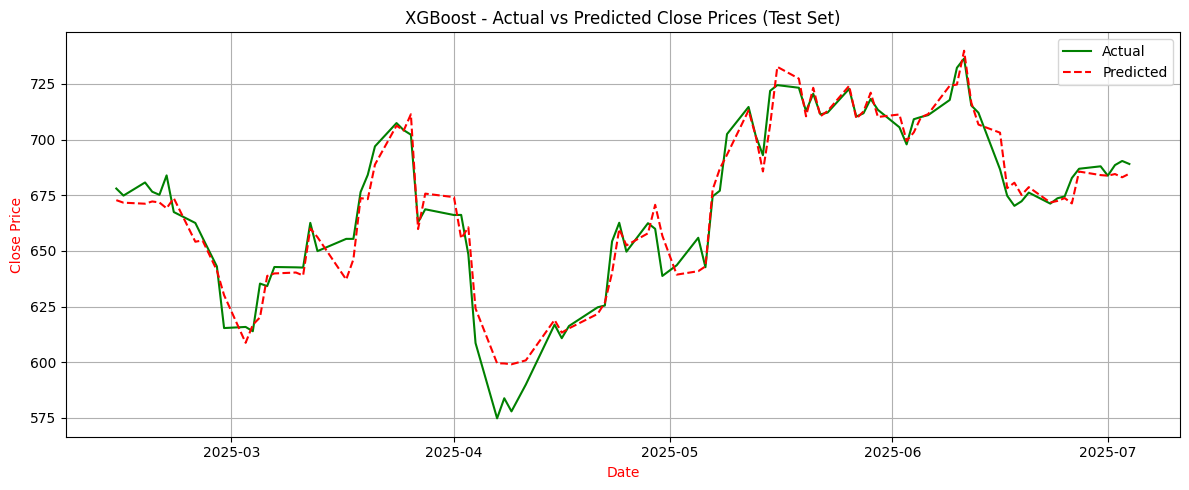

In [ ]:
# Plot actual vs forecast for the test set
plt.figure(figsize=(12, 5))
plt.plot(X_test['Date'], y_test, label='Actual', color='green')
plt.plot(X_test['Date'], y_pred_test, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date', color='red')
plt.ylabel('Close Price', color='red')
plt.title('XGBoost - Actual vs Predicted Close Prices (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Next 7-day forecasting
Used the trained model to forecast the closing prices for the next 7 days and visualize the forecast.


In [ ]:
# Forecast the next 7 days
n_forecast_days = 7
last_date = df['Date'].iloc[-1]

# Create a DataFrame for future dates and initialize with the last known Close price
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast_days, freq='B') # Use 'B' for business days

# Recursively forecast and update lag features
forecast_xgb = []
last_row = df.iloc[-1].copy()
current_lags = last_row[[f'lag_{i}' for i in range(1, n_lags + 1)]].values.flatten().tolist()
last_close = last_row['Close']

In [ ]:
for i in range(n_forecast_days):
    # Create the input for the next prediction including High, Low, Open, and Volume from the last actual day
    # For future predictions, we'll use the last known High, Low, Open, Volume from the actual data for simplicity
    input_data = {
        'High': last_row['High'],
        'Low': last_row['Low'],
        'Open': last_row['Open'],
        'Volume': last_row['Volume']
    }
    for j in range(1, n_lags + 1):
        input_data[f'lag_{j}'] = current_lags[j-1]

    input_df = pd.DataFrame([input_data])


    # Predict the next day's close price
    next_pred = model.predict(input_df)[0]
    forecast_xgb.append(next_pred)

    # Update lags for the next iteration. The new lag_1 is the most recent prediction.
    current_lags.insert(0, next_pred)
    current_lags.pop()
    last_close = next_pred # Update last_close to the new prediction for the next iteration

In [ ]:
# Create a pandas Series for the forecast
forecast_series_xgb = pd.Series(forecast_xgb, index=future_dates)

# Add the last actual value to the start of the forecast for continuity in plotting
last_actual_date = df['Date'].iloc[-1]
last_actual_price = df['Close'].iloc[-1]

forecast_series_xgb_cont = pd.concat([
    pd.Series([last_actual_price], index=[last_actual_date]),
    forecast_series_xgb
])

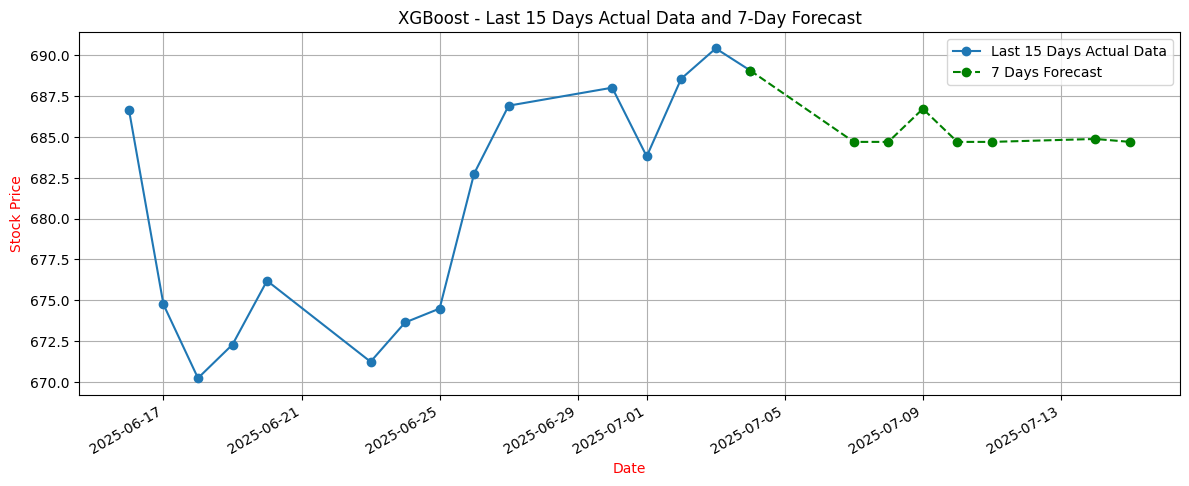

In [ ]:
# Plot the forecast focusing on the last 15 days of actual data and the next 7 day
plt.figure(figsize=(12, 5))

# Plot last 15 days of actual data
plt.plot(df['Date'].iloc[-15:], df['Close'].iloc[-15:], label='Last 15 Days Actual Data', marker='o', linestyle='-')

# Use the forecast_series_xgb_cont which already includes the last actual point for continuity
plt.plot(forecast_series_xgb_cont.index, forecast_series_xgb_cont.values, label='7 Days Forecast', color='green', marker='o', linestyle='--')
plt.title('XGBoost - Last 15 Days Actual Data and 7-Day Forecast')
plt.xlabel('Date', color='red')
plt.ylabel('Stock Price', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()
date_form = mdates.DateFormatter('%Y-%m-%d') # Define date format
plt.gca().xaxis.set_major_formatter(date_form) # Apply date format

plt.show()

# Calculating the Model Performance metrices

In [ ]:
# Calculate evaluation metrics
print("XGBoost Model Performance Metrics :\n")

# MSE
mse = mean_squared_error(y_test, y_pred_test)
print(f"MSE: {mse:.2f}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# MAPE
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

# R² Score
r2 = r2_score(y_test, y_pred_test)
print(f"R² Score: {r2:.4f}")

XGBoost Model Performance Metrics :

MSE: 65.66
RMSE: 8.10
MAPE: 0.92%
R² Score: 0.9512
